# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100


reviews = []
#list to collect date
date = []
country=[]
recommended = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())


    #date
    for para in parsed_content.find_all("time"):
         date.append(para.get_text())
    #country
    for para in parsed_content.find_all("h3"):
          #  country.append(para.get_text())
            country.append(para.span.next_sibling.text.strip(" ()"))

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame({"reviews":reviews, "date":date, "country": country})
df.head()

,reviews,date,country
0,Not Verified | Paid a quick visit to Nice yest...,22nd May 2023,United Kingdom
1,✅ Trip Verified | Words fail to describe this...,19th May 2023,United States
2,✅ Trip Verified | Absolutely terrible experie...,17th May 2023,United States
3,✅ Trip Verified | BA overbook every flight to ...,17th May 2023,United Kingdom
4,✅ Trip Verified | \r\nThe flights were all on...,17th May 2023,United Kingdom


In [ ]:
df.shape

(1000, 3)

In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")
df1= df["verified"]
df1

0      False
1       True
2       True
3       True
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: verified, Length: 1000, dtype: bool

# Data clearning

In [ ]:
review = df.reviews.str.split('|',expand=True)[1]

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#NLTK
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lem = WordNetLemmatizer()
import re

clean_review=[]
#remove punctuations, smallcase
for rev in review:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lem.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    clean_review.append(rev)

In [ ]:
df['clean_review']= clean_review

In [ ]:
df.head()

,reviews,date,country,verified,clean_review
0,Not Verified | Paid a quick visit to Nice yest...,22nd May 2023,United Kingdom,False,paid quick visit nice yesterday heathrow decid...
1,✅ Trip Verified | Words fail to describe this...,19th May 2023,United States,True,word fail describe last awful flight baby acro...
2,✅ Trip Verified | Absolutely terrible experie...,17th May 2023,United States,True,absolutely terrible experience app would let c...
3,✅ Trip Verified | BA overbook every flight to ...,17th May 2023,United Kingdom,True,ba overbook every flight maximise income regar...
4,✅ Trip Verified | \r\nThe flights were all on...,17th May 2023,United Kingdom,True,flight time except belfast london never staff ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews       1000 non-null   object
 1   date          1000 non-null   object
 2   country       1000 non-null   object
 3   verified      1000 non-null   bool  
 4   clean_review  1000 non-null   object
dtypes: bool(1), object(4)
memory usage: 32.4+ KB


# Data Analysis

##Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

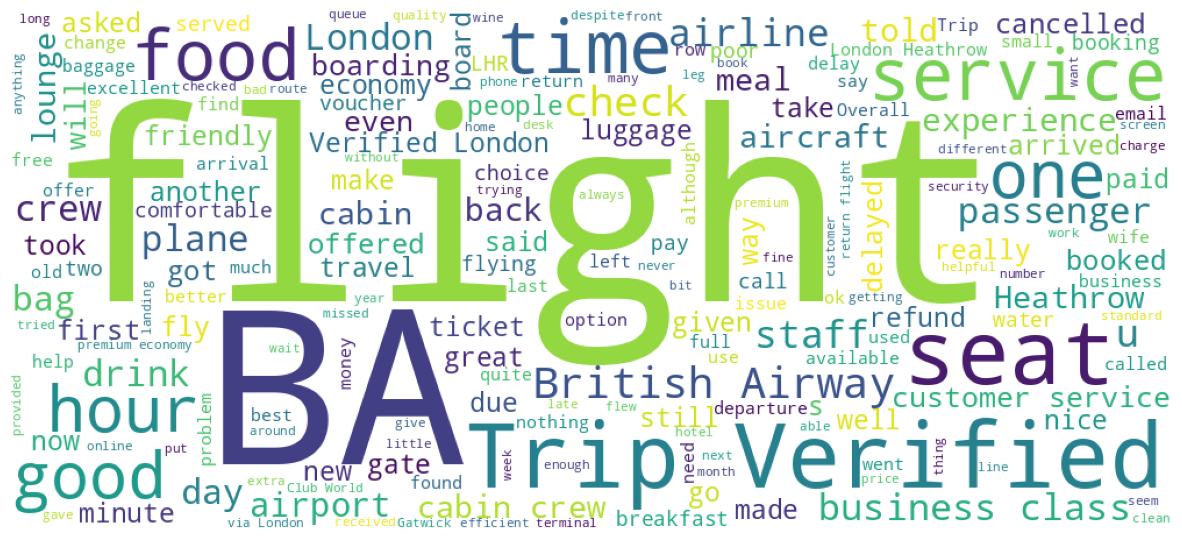

In [ ]:
words = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        words.append(x)

unique_string = (" ").join(words)

wordcloud= WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites
From the wordcloud above, we can see the key of topics in customer review are flight, seat , service and time. showing that people are actively talking about their experience on the plane and the staff

# Sentiment Analysis

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)


def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,date,country,verified,clean_review,Sentiment,Analysis
0,Not Verified | Paid a quick visit to Nice yest...,22nd May 2023,United Kingdom,False,paid quick visit nice yesterday heathrow decid...,0.9382,Positive
1,✅ Trip Verified | Words fail to describe this...,19th May 2023,United States,True,word fail describe last awful flight baby acro...,-0.9746,Negative
2,✅ Trip Verified | Absolutely terrible experie...,17th May 2023,United States,True,absolutely terrible experience app would let c...,-0.9649,Negative
3,✅ Trip Verified | BA overbook every flight to ...,17th May 2023,United Kingdom,True,ba overbook every flight maximise income regar...,-0.7890,Negative
4,✅ Trip Verified | \r\nThe flights were all on...,17th May 2023,United Kingdom,True,flight time except belfast london never staff ...,-0.6334,Negative


In [ ]:
analysis = df['Analysis'].value_counts()
analysis

Negative    471
Positive    436
Neutral      93
Name: Analysis, dtype: int64

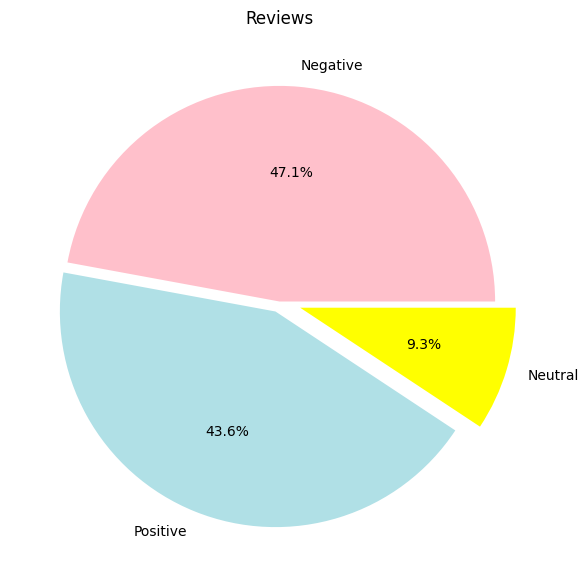

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,2)
plt.title("Reviews")
plt.pie(analysis.values, labels = analysis.index, explode = (0, 0.05, 0.1), autopct='%1.1f%%', shadow=False , colors=("pink", "powderblue", "yellow"))
plt.show()

In [ ]:
df.to_csv("data/BA_reviews.csv")